Q1.(1 Ponto) Para cada um dos agentes a seguir, desenvolva uma descrição
completando a tabela abaixo sobre o ambiente de tarefas de cada um.

(a) Agente comentarista de jogo.

(b) Agente sugestor de vinho.

(c) Agente treinador de time (como de basquete).

Resposta:

(a) Agente comentarista de jogo de futebol.

<strong>Medida de desempenho</strong>: Os comentários precisam se referir aos acontecimentos do jogo em questão, precisam ser feitos na hora em que ocorrem e precisam passar bem a informação para o ouvinte.

<strong>Ambiente</strong>: Jogo.

<strong>Atuadores</strong>: Voz, saída de áudio de algum transmissor.

<strong>Sensores</strong>: Jogadores.

(b) Agente sugestor de vinho em um restaurante.

<strong>Medida de desempenho</strong>: Possuir um vasto conhecimento sobre as características dos vinhos, identificar bem qual vinho é mais adequado para as preferências de quem vai consumir e se combina com o prato que está sendo servido.

<strong>Ambiente</strong>: Restaurante, vinho e consumidor.

<strong>Atuadores</strong>: Voz.

<strong>Sensores</strong>: Prato servido, preferências do consumidor.

(c) Agente técnico de time de futebol.

<strong>Medida de desempenho</strong>: Saber planejar bem as jogadas que serão feitas pelo time, saber aproveitar bem as características de cada jogador do seu time (como seus pontos fortes e fracos) e saber manter a moral de seu time o mais alto possível.

<strong>Ambiente</strong>: Jogadores, jogo.

<strong>Atuadores</strong>: Voz, quadro de estratégias.

<strong>Sensores</strong>: Visão.




Q2.(2 Pontos) Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha
uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma
base.

<strong>Base de dados utilizada</strong>: https://www.kaggle.com/datasets/uciml/glass

<strong>Aprendizado supervisionado</strong>: O algoritmo recebe um conjunto de objetos para seu treinamento, cada um com suas características e com seu rótulo, ou seja, a classe que o objeto pertence. De modo que, quando for inserido um objeto não-rotulado, a máquina consiga classificar esse objeto com base na experiência obtida em seu período de treinamento.

Aplicando esse aprendizado na base de dados escolhida, o algoritmo receberá um grande conjunto de objetos que representam vidros, cada um deles com todas as características, que são: índice de refração, e a porcentagem do peso de cada um dos seguintes materiais presentes: Na(Sódio), Mg(Magnésio), Al(Alumínio), Si(Silício),K(Potássio), Ca(Cálcio), Ba(Bário) e Fe(Ferro). Seguido de seu rótulo, que representa a classificação do vidro, podendo ser: buildingwindowsfloatprocessed, buildingwindowsnonfloatprocessed, vehiclewindowsfloatprocessed, vehiclewindowsnonfloatprocessed, containers, tableware ou headlamps. Feito isso, ao apresentar um novo objeto não-rotulado, o algoritmo será capaz de classificá-lo baseado na experiência obtida anteriormente.

<strong>Aprendizado não-supervisionado</strong>: O algoritmo recebe um conjunto de objetos, cada um com suas características, porém sem o seu rótulo. Feito isso, o algoritmo, sozinho, que agrupará cada objeto em uma determinada classe, baseado nos padrões das informações que foram dadas à ele.

Aplicando esse aprendizado na base de dados escolhida, o algoritmo receberá um grande conjunto de objetos que representam vidros, cada um deles com todas as suas características, semelhante ao item anterior, porém sem os rótulos. O algoritmo agrupará os objetos em classes diferentes, observando padrões em suas características semelhantes.

<strong>Aprendizado semi-supervisionado</strong>: O algoritmo recebe um conjunto de objetos, cada um com suas características, porém apenas alguns deles possuem rótulos. O algoritmo agrupará primeiro os objetos não-rotulados, semelhante ao aprendizado não-supervisionado, e então assimilará cada grupo com as classes dos objetos rotulados semelhantes.

Aplicando esse aprendizado na base de dados escolhida, o algorítmo receberá um conjunto de objetos que representam vidros, cada um deles com todas as suas características, porém apenas alguns deles apresentam suas classificações. O algoritmo, primeiramente, agrupará os objetos sem classificação com características semelhantes, e depois assimilará com as classes dos objetos com classificação com características parecidas.

<strong>Aprendizado por reforço</strong>: O algoritmo, levando em consideração que o agente conhece as ações disponíveis e uma medida de desempenho que se comunica com essas ações, realizará diversos testes de tentativa e erro até encontrar uma combinação de ações que maximize essa medida de desempenho.

A base de dados escolhida não é adequada para aplicar este método de aprendizado. Porém, se levarmos em consideração que o índice de refração fosse uma medida de desempenho, e as ações fossem adicionar ou remover os materiais para alterar o índice de refração. O algoritmo procuraria a combinação de materiais disponíveis para maximizar o índice de refração do vidro através da tentativa e erro. Este método de aprendizado poderia levar milhões de iterações para obter o objetivo desejado.

In [ ]:
#Q3.

import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

df = pd.read_csv('glass.csv', delimiter=",")
df

# Como a base de dados é composta por porcentagens da composição de cada vidro,
# é seguro dizer que não há presença de valores outliers, pois, qualquer mudança
# na porcentagem de um material, muda a composição do vidro, o que pode mudar 
# sua classificação.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df['Type'].value_counts()

# 1 - buildingwindowsfloatprocessed
# 2 - buildingwindowsnonfloatprocessed
# 3 - vehiclewindowsfloatprocessed
# 4 - vehiclewindowsnonfloatprocessed
# 5 - containers
# 6 - tableware
# 7 - headlamps

# Nesta base de dados, nenhum objeto foi classificado como 4 (vehiclewindowsnonfloatprocessed)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
# Verificar se possui valores faltantes
print('Valores faltantes:', df.isnull().sum())

Valores faltantes: RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
# Verificar se possui valores duplicados
print('Valores duplicados:', df.duplicated())

Valores duplicados: 0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool


In [ ]:
# Reduzirei a quantidade de 1 e 2 para 40, com o objetivo de balancear mais os dados

df.drop(df.loc[df['Type'] == 1].sample(n=30, random_state = 43).index, inplace=True)
df.drop(df.loc[df['Type'] == 2].sample(n=36, random_state = 43).index, inplace=True)

df['Type'].value_counts()


1    40
2    40
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm') 

# Aplicando a correlação, obtemos o seguinte mapa de correlação

# Analisando o mapa abaixo, vemos que não há um valor de correlação alto
# o bastante a ponto de ser necessário retirar a coluna

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.172432,0.042855,-0.328352,-0.530521,-0.261965,0.719528,0.044129,0.255447,-0.174253
Na,-0.172432,1.000000,-0.360729,0.122689,0.007927,-0.306641,-0.240329,0.323696,-0.267721,0.523525
Mg,0.042855,-0.360729,1.000000,-0.610016,-0.224597,-0.031062,-0.335877,-0.518963,0.086270,-0.804512
Al,-0.328352,0.122689,-0.610016,1.000000,-0.070172,0.297332,-0.126875,0.482485,-0.085943,0.597100
Si,-0.530521,0.007927,-0.224597,-0.070172,1.000000,-0.274136,-0.122675,-0.127760,-0.126142,0.180787
K,-0.261965,-0.306641,-0.031062,0.297332,-0.274136,1.000000,-0.313783,-0.057039,-0.013777,-0.034220
Ca,0.719528,-0.240329,-0.335877,-0.126875,-0.122675,-0.313783,1.000000,-0.128965,0.201429,0.043408
Ba,0.044129,0.323696,-0.518963,0.482485,-0.127760,-0.057039,-0.128965,1.000000,-0.056706,0.546940
Fe,0.255447,-0.267721,0.086270,-0.085943,-0.126142,-0.013777,0.201429,-0.056706,1.000000,-0.228694
Type,-0.174253,0.523525,-0.804512,0.597100,0.180787,-0.034220,0.043408,0.546940,-0.228694,1.000000


In [ ]:
# Criação dos arquivos de treinamento e tese

from sklearn import cluster, neighbors, svm, metrics, preprocessing

trainSample = df.sample(frac=0.8, random_state = 1) #seleção de 80% da base para treinamento
testSample = pd.concat([df, trainSample]).drop_duplicates(keep=False) #concatena a base original com a base de treinamento e exclui os duplicados, sobrando a amostra de teste

trainTarget = trainSample["Type"] #define o atributo alvo da base para o treinamento
testTarget = testSample["Type"] #define o atributo alvo da base para o teste


del testSample["Type"]
del trainSample["Type"]

In [ ]:
# Aplicando o K-NN com a métrica de distância euclidiana

# As métricas de avaliação utilizadas foram as seguintes:

# Sensibilidade: Corresponde a proporção entre as respostas corretas que o algoritmo
# previu, tanto os verdadeiros positivos quanto os verdadeiros negativos, com a
# soma destes mais os pontos definidos como falso positivos e falsos negativos.

# Precisão: Corresponde a proporção entre as respostas corretas que o algoritmo 
# previu, porém apenas os verdadeiros positivos, com a soma destes mais os pontos
# definidos como falsos positivos.

# Medida F1: É a média harmônica entre precisão e sensibilidade. Quando seu valor
# está alto, significa que os valores de VP, VN, FP, FN aferidos não apresentam
# grandes distorções. Também pode-se interpretar como uma medida de confiabilidade 
# da acurácia.
 

for i in range(1,10):
  if( i%2 == 0 ):
    continue

  print('K = ', i)

  knn = neighbors.KNeighborsClassifier(n_neighbors=i, algorithm="auto", metric='euclidean') #k vizinhos mais próximos = n_neighbors
  knn.fit(trainSample, trainTarget)
  resultKNN = knn.predict(testSample)
  # Avaliando o modelo

  print("\nK-NN")
  print("Sensibilidade: %0.2f" % (metrics.recall_score(testTarget, resultKNN, average='macro')))
  print("Precisão: %0.2f" % (metrics.precision_score(testTarget, resultKNN, average='macro')))
  print("Medida F1: %0.2f" % (metrics.f1_score(testTarget, resultKNN, average='macro')))
  


  matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)
  print("Matriz de Confusão:\n",matrizConfusao)
  print('---------------------------------------------------------------')

# Podemos observar que o melhor valor de K, para a nossa base de dados e utilizando
# a métrica de distancia euclidiana, é igual a 1, pois, com ele obtivemos a maiores
# valores de Sensibilidade, Precisão e da Medida F1 entre os testes.

In [ ]:
# Aplicando o K-NN com a métrica de distancia de Manhattan (procedimento padrão da função KNeighborsClassifier)

for i in range(1,10):
  if( i%2 == 0 ):
    continue

  print('K = ', i)

  knn = neighbors.KNeighborsClassifier(n_neighbors=i, algorithm="auto", metric='manhattan') #k vizinhos mais próximos = n_neighbors
  knn.fit(trainSample, trainTarget)
  resultKNN = knn.predict(testSample)
  # Avaliando o modelo

  print("\nK-NN")
  print("Sensibilidade: %0.2f" % (metrics.recall_score(testTarget, resultKNN, average='macro')))
  print("Precisão: %0.2f" % (metrics.precision_score(testTarget, resultKNN, average='macro')))
  print("Medida F1: %0.2f" % (metrics.f1_score(testTarget, resultKNN, average='macro')))


  matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)
  print("Matriz de Confusão:\n",matrizConfusao)
  print('---------------------------------------------------------------')

# Podemos observar que o melhor valor de K, para a nossa base de dados e utilizando
# a métrica de distancia de Manhattan, é igual a 1, pois, com ele obtivemos a maiores
# valores de Sensibilidade, Precisão e da Medida F1 entre os testes.


In [ ]:
# Com base nos testes feitos anteriormente, a melhor métrica utilizada foi a de
# distância euclidiana com o K = 1

print('K = 1')

knn = neighbors.KNeighborsClassifier(n_neighbors=1, algorithm="auto", metric='euclidean') #k vizinhos mais próximos = n_neighbors
knn.fit(trainSample, trainTarget)
resultKNN = knn.predict(testSample)
# Avaliando o modelo

print("\nK-NN")
print("Sensibilidade: %0.2f" % (metrics.recall_score(testTarget, resultKNN, average='macro')))
print("Precisão: %0.2f" % (metrics.precision_score(testTarget, resultKNN, average='macro')))
print("Medida F1: %0.2f" % (metrics.f1_score(testTarget, resultKNN, average='macro')))
  


matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)
print("Matriz de Confusão:\n",matrizConfusao)
print('---------------------------------------------------------------')

Sensibilidade:  0.7859585517688285
Especificidade:  0.9679320601764494
Precisao:  0.7272799208704254
Medida F1:  0.7468401800270371
Acuracia:  0.9546147978642258
Coef de Matthews:  0.7131197999274905
Curva ROC: 


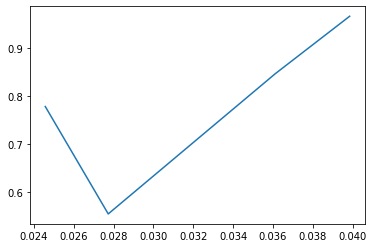

AUC =  0.011361697284111533


In [ ]:
# Q4.

import numpy as np

sensibilidade = []  # vp / (vp + fn)
especificidade= [] # vn / (vn + fp)
precisao  	  = []  # vp / (vp + fp)
medidaF1      = []  # (2*precisao * sensibilidade) / (precisao + sensibilidade)
acuracia      = []  # (vp + vn) / (vp + fp + vn + fn)
matthews      = []  # (vp*vn-fp*fn) / math.sqrt((vp+fp)*(vp+fn)*(vn+fp)*(vn+fn))
x             = []
y             = []
AUC           = []


def metricasAppend(vp, fp, vn, fn):

  s= vp / (vp + fn)
  sensibilidade.append(s)

  e= vn / (vn + fp)
  especificidade.append(e)

  p= vp / (vp + fp)
  precisao.append(p)

  f1= (2*p*s) / (p+s)
  medidaF1.append(f1)

  a = (vp+vn) / (vp+fp+vn+fn)
  acuracia.append(a)

  matt = (vp*vn-fp*fn) / math.sqrt((vp+fp)*(vp+fn)*(vn+fp)*(vn+fn))
  matthews.append(matt) 

  x.append(1-e)
  y.append(s)




# Maçã

vp= 70
vn= 67+3+20+30+55+10+4+2+1000
fp= 20+5+5
fn= 10+5+5

metricasAppend(vp, fp, vn, fn)

# Laranja

vp= 67
vn= 70+5+5+5+55+2+5+10+1000
fp= 10+3+20
fn= 20+30+4

metricasAppend(vp, fp, vn, fn)

# Limao

vp= 55
vn= 70+20+10+67+5+4+5+20+1000
fp= 5+30+10
fn= 5+3+2

metricasAppend(vp, fp, vn, fn)

# Manga

vp= 1000
vn= 70+20+5+10+67+3+5+30+55
fp= 5+4+2
fn= 5+20+10

metricasAppend(vp, fp, vn, fn)

# Resposta


print("Sensibilidade: ", np.mean(sensibilidade))
print("Especificidade: ", np.mean(especificidade))
print("Precisao: ", np.mean(precisao))
print("Medida F1: ", np.mean(medidaF1))
print("Acuracia: ", np.mean(acuracia))
print("Coef de Matthews: ", np.mean(matthews))

import matplotlib.pyplot as plt
import numpy as np

print("Curva ROC: ")
# This is the ROC curve
plt.plot(x,y)
plt.show() 

# This is the AUC
auc = np.trapz(y,x)

print("AUC = ", auc)

# Ao analisarmos a Acurácia da máquina, vemos que o mesmo possui 95.4%, ou seja, entre
# todos os casos positivos e negativos, a máquina acertou quase todos os casos. Porém
# se olharmos para a Precisão, vemos que seu valor é de 72.7%, ou seja, entre apenas
# os casos positivos, a máquina errou 27.3%. Analisando a tabela de confusão, vemos que
# a máquina errou quase metade dos casos de laranja, e errou muito poucos casos de manga, 
# isso ocorre por causa do desbalanceamento dos objetos de teste, existem muitos casos de
# manga (mais de 1000), e isto interfere na decisão da máquina na hora de classificar uma
# fruta difetente. Para resolver esse problema, podemos fazer dois jeitos, ou removemos do
# arquivo de teste os objetos mangas, de modo que tenha uma quantidade parecida com o resto
# das frutas, ou adicionamos mais casos de outras frutas, de modo que tenha uma quantidade 
# parecida com a classe manga.

